[View in Colaboratory](https://colab.research.google.com/github/abhiksark/MajorProject/blob/master/inceptionv3lr0.0001.ipynb)

In [0]:
!pip install -U -q PyDrive

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from google.colab import files
uploaded = files.upload()
!pip install -U -q PyDrive ## you will have install for every colab session




Saving kaggle.json to kaggle.json


In [3]:
!mkdir /content/.kaggle
#!mv /content/.kaggle kaggle.json
#!ls
#!chmod 600 ~ kaggle.json
!mv kaggle.json /content/.kaggle
!ls /content/.kaggle/
!chmod 600 ~ /content/.kaggle/kaggle.json


kaggle.json


In [4]:
!pip install kaggle
!kaggle competitions list -s health
!kaggle competitions download -c diabetic-retinopathy-detection -p datalab

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/98/be/57/a576a1f2f50f5c3bebd0c08fc3b2a6881dfde31c8217014978
Successfully built kaggle
ref                                        deadline             category      reward  teamCount  userHasEntered  
-----------------------------------------  -------------------  --------  ----------  ---------  --------------  
hhp                                        2013-04-04 07:00:00  Featured    $500,000       1353           False  
ultrasound-nerve-segmentation              2016-08-18 23:59:00  Featured    $100,000        923           False  
diabetic-retinopathy-detection             2015-07-27 23:59:00  Featured    $100,000        661            True  
msk-redefining-cancer-treatment            2017-10-02 23:59:00  Research     $15,000       1386           False  
second-annual-data-science-bowl            2016-03-14 23:59:00  Featured    $200,000        773           False  
melbour

train.zip.004: Downloaded 8GB of 8GB
train.zip.002: Downloaded 8GB of 8GB


train.zip.001: Downloaded 8GB of 8GB
train.zip.005: Downloaded 1GB of 1GB
train.zip.003: Downloaded 8GB of 8GB


test.zip.004: Downloaded 8GB of 8GB

test.zip.002: Downloaded 8GB of 8GB


test.zip.003: Downloaded 8GB of 8GB
test.zip.001: Downloaded 8GB of 8GB


test.zip.006: Downloaded 8GB of 8GB
test.zip.007: Downloaded 3GB of 3GB


In [5]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  p7zip
Suggested packages:
  p7zip-rar
The following NEW packages will be installed:
  p7zip p7zip-full
0 upgraded, 2 newly installed, 0 to remove and 0 not upgraded.
Need to get 1,467 kB of archives.
After this operation, 5,415 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/universe amd64 p7zip amd64 16.02+dfsg-4 [348 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/universe amd64 p7zip-full amd64 16.02+dfsg-4 [1,119 kB]
Fetched 1,467 kB in 0s (1,613 kB/s)
Selecting previously unselected package p7zip.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../p7zip_16.02+dfsg-4_amd64.deb ...
Unpacking p7zip (16.02+dfsg-4) ...
Selecting previously unselected package p7zip-full.
Preparing to unpack .../p7zip-full_16.02+dfsg-4_amd64.deb ...
Unpacking p7zip-full 

In [0]:
%%capture
!7z x datalab/train.zip.001

In [7]:
!ls train | head -4

10003_left.jpeg
10003_right.jpeg
10007_left.jpeg
10007_right.jpeg
ls: write error: Broken pipe


In [8]:
"""from google.colab import files
for i in range(11,59):
  try:
    files.download("train/100"+str(int(i))+"_left.jpeg")
    files.download("train/100"+str(int(i))+"_right.jpeg")
  except:
     pass"""

'from google.colab import files\nfor i in range(11,59):\n  try:\n    files.download("train/100"+str(int(i))+"_left.jpeg")\n    files.download("train/100"+str(int(i))+"_right.jpeg")\n  except:\n     pass'

In [9]:
import numpy as np # linear algebra
import pandas as pd 
import os
import cv2 as cv
import math
import keras

from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras import layers, models, optimizers

Using TensorFlow backend.


In [10]:
!unzip datalab/trainLabels.csv.zip

Archive:  datalab/trainLabels.csv.zip
  inflating: trainLabels.csv         


In [11]:
!ls

datalab  train	trainLabels.csv


35126

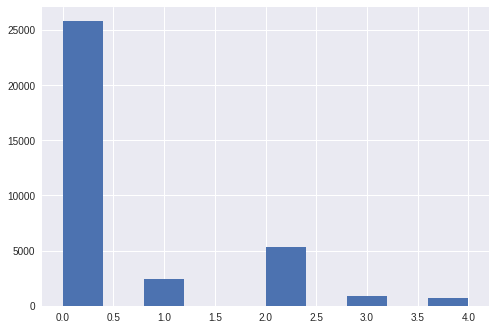

In [12]:
trainLabels = pd.read_csv("trainLabels.csv")
trainLabels.head()
trainLabels["level"].hist()
trainLabels["level"].unique()
listing = os.listdir("train") 
len(listing)

In [0]:
listing_train=listing[:25000]
listing_val=listing[25000:]


In [1]:
!ls

datalab  output  train	trainLabels.csv


In [0]:
!mkdir train/train
!mkdir train/val

In [0]:
%%capture
import os

dir_path = "./train/"
output_path = "./train/train/"

if not os.path.exists(output_path):
    os.mkdir(output_path)

for file_name in listing_train:
    if "jpeg" in file_name:
      if str(file_name).split("_")[1]=="right.jpeg":
        os.rename(dir_path+file_name,output_path+file_name)


In [0]:
%%capture
import os

dir_path = "./train/"
output_path = "./train/val/"

if not os.path.exists(output_path):
    os.mkdir(output_path)

for file_name in listing_val:
    if "jpeg" in file_name:
      if str(file_name).split("_")[1]=="right.jpeg":
        os.rename(dir_path+file_name,output_path+file_name)


In [44]:
!ls train/val -1 | wc -l
!ls train/train -1 | wc -l

5
5


In [45]:
!ls train/val/0 -1 | wc -l
!ls train/train/0 -1 | wc -l

899
1796


In [46]:
!ls train/val/1 -1 | wc -l
!ls train/train/1 -1 | wc -l

598
1496


In [47]:
!ls train/val/2 -1 | wc -l
!ls train/train/2 -1 | wc -l

450
1199


In [48]:
!ls train/val/3 -1 | wc -l
!ls train/train/3 -1 | wc -l

336
1005


In [49]:
!ls train/val/4 -1 | wc -l
!ls train/train/4 -1 | wc -l

333
731


In [0]:
def delete_from_dir(path,num):
  listing = os.listdir(path)
  for rem in listing[num:]:
    os.remove(path+rem)

In [0]:
delete_from_dir("train/train/0/",600)
delete_from_dir("train/val/0/",300)
delete_from_dir("train/train/1/",500)
delete_from_dir("train/val/1/",200)
delete_from_dir("train/train/2/",400)
delete_from_dir("train/val/2/",150)


In [0]:
%%capture
import os
import math
from skimage import io
from skimage import exposure

def data_aug(path):
    listing_test = os.listdir(path)
    for file_name in listing_test:
        if "jpeg" in file_name:
            image = io.imread(path+file_name)
            #v_min, v_max = np.percentile(image, (0.2, 99.8))
            #better_contrast = exposure.rescale_intensity(image, in_range=(v_min, v_max))
            log_correction_image = exposure.adjust_log(image)
            sigmoid_correction_image = exposure.adjust_sigmoid(image)
            #horizontal_flip = image[:, ::-1]
            color_inversion_image_with_np = np.invert(image)
            adjusted_gamma_image = exposure.adjust_gamma(image, gamma=0.4, gain=0.9)
            #io.imsave(path+str(1)+file_name,better_contrast)
            io.imsave(path+str(2)+file_name,log_correction_image)
            io.imsave(path+str(3)+file_name,sigmoid_correction_image)
            #io.imsave(path+str(4)+file_name,horizontal_flip)
            #io.imsave('./images/'+str(5)+file_name,adjusted_gamma_image)
            #io.imsave('./images/invert'+file_name,color_inversion_image_with_np)

        

In [0]:
import os
import math
from skimage import io
from skimage import exposure

def invert(path):
    listing_test = os.listdir(path)
    for file_name in listing_test:
        if "jpeg" in file_name:
            image = io.imread(path+file_name)
            color_inversion_image_with_np = np.invert(image)
            #io.imsave('./images/'+str(5)+file_name,adjusted_gamma_image)
            io.imsave(path+file_name,color_inversion_image_with_np)


In [0]:
from PIL import Image
from skimage import exposure
import os, sys
import cv2

def resize(path):
    dirs = os.listdir( path )
    print(dirs)
    for file_name in dirs:
        if "jpeg" in file_name:
            #img = Image.open(path+file_name)
            img = cv2.imread(path+file_name)
            f, e = os.path.splitext(path+file_name)
            print(f)
            #imResize = green.resize((299,299), Image.ANTIALIAS)
            #img = exposure.equalize_hist(imResize)
            #img.save(f +  '.jpg', quality=100)
            img  = cv2.resize(img, (299,299), interpolation = cv2.INTER_AREA)
            img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
            img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
            img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
            cv2.imwrite(f +  '.jpeg',img)


In [42]:
from multiprocessing import Pool

        
p = Pool(processes=6)        
        
arr = ["train/train/2/","train/train/1/","train/train/3/","train/train/4/","train/val/0/","train/val/1/","train/val/2/","train/val/3/","train/val/4/"]


result = p.map(resize,arr)



['39772_right.jpeg', '30675_right.jpeg', '20458_right.jpeg', '41174_right.jpeg', '10570_right.jpeg', '18143_right.jpeg', '29865_right.jpeg', '20855_right.jpeg', '41584_right.jpeg', '13664_right.jpeg', '31043_right.jpeg', '19485_right.jpeg', '28077_right.jpeg', '41430_right.jpeg', '22716_right.jpeg', '4496_right.jpeg', '34995_right.jpeg', '43141_right.jpeg', '36653_right.jpeg', '21788_right.jpeg', '27251_right.jpeg', '39188_right.jpeg', '3412_right.jpeg', '9353_right.jpeg', '17899_right.jpeg', '15343_right.jpeg', '11874_right.jpeg', '35112_right.jpeg', '35199_right.jpeg', '37849_right.jpeg', '38518_right.jpeg', '8292_right.jpeg', '33812_right.jpeg', '42815_right.jpeg', '41201_right.jpeg', '8236_right.jpeg', '38325_right.jpeg', '15975_right.jpeg', '14021_right.jpeg', '33283_right.jpeg', '19604_right.jpeg', '9157_right.jpeg', '38513_right.jpeg', '5105_right.jpeg', '19771_right.jpeg', '19471_right.jpeg', '12861_right.jpeg', '10047_right.jpeg', '21373_right.jpeg', '35461_right.jpeg', '8388_

['4687_right.jpeg', '3553_right.jpeg', '6524_right.jpeg', '20567_right.jpeg', '25511_right.jpeg', '22948_right.jpeg', '9159_right.jpeg', '216_right.jpeg', '31820_right.jpeg', '35187_right.jpeg', '39798_right.jpeg', '3880_right.jpeg', '6552_right.jpeg', '44348_right.jpeg', '36441_right.jpeg', '37454_right.jpeg', '28365_right.jpeg', '31172_right.jpeg', '2817_right.jpeg', '7232_right.jpeg', '27118_right.jpeg', '15323_right.jpeg', '27029_right.jpeg', '40349_right.jpeg', '6482_right.jpeg', '8797_right.jpeg', '43713_right.jpeg', '13573_right.jpeg', '12179_right.jpeg', '20112_right.jpeg', '3515_right.jpeg', '14630_right.jpeg', '33260_right.jpeg', '20322_right.jpeg', '35367_right.jpeg', '615_right.jpeg', '40764_right.jpeg', '14638_right.jpeg', '10317_right.jpeg', '30326_right.jpeg', '40385_right.jpeg', '10552_right.jpeg', '39359_right.jpeg', '36234_right.jpeg', '26078_right.jpeg', '44023_right.jpeg', '12868_right.jpeg', '39994_right.jpeg', '26828_right.jpeg', '4244_right.jpeg', '22291_right.jp

train/val/1/21604_right
train/val/0/6524_right
train/train/4/30675_right
train/train/1/25628_right
train/train/2/6200_right
train/train/3/2862_right
train/val/1/41059_right
train/train/4/20458_right
train/val/0/20567_right
train/train/1/4230_right
train/train/2/27297_right
train/train/3/28405_right
train/val/1/44196_right
train/train/4/41174_right
train/train/1/37792_right
train/val/0/25511_right
train/train/3/6687_right
train/val/0/22948_right
train/val/1/9467_right
train/train/1/39333_right
train/train/2/36492_right
train/train/4/10570_right
train/val/0/9159_right
train/train/3/23695_right
train/train/2/24092_right
train/train/4/18143_right
train/val/1/9959_right
train/val/0/216_right
train/train/1/4300_right
train/train/2/25871_right
train/train/4/29865_right
train/train/3/40366_right
train/val/0/31820_right
train/train/4/20855_right
train/train/2/29050_right
train/train/1/27695_right
train/val/1/29330_right
train/val/0/35187_right
train/train/3/16936_right
train/train/1/2802_right


train/val/0/28365_right
train/val/1/3895_right
train/train/2/28790_right
train/train/3/23453_right
train/train/4/34995_right
train/train/1/20134_right
train/val/1/39369_right
train/train/3/31784_right
train/val/0/31172_right
train/train/2/36907_right
train/val/1/31540_right
train/train/4/43141_right
train/train/1/16458_right
train/val/1/9933_right
train/train/2/14748_right
train/train/3/37426_right
train/train/4/36653_right
train/val/0/2817_right
train/val/1/15554_right
train/train/1/14805_right
train/train/2/39036_right
train/train/3/1420_right
train/train/4/21788_right
train/val/1/25656_right
train/val/0/7232_right
train/train/2/15138_right
train/train/1/32768_right
train/val/1/18972_right
train/train/3/30307_right
train/val/0/27118_right
train/train/3/3992_right
train/train/4/27251_right
train/train/2/32391_right
train/val/1/24996_right
train/train/2/22577_right
train/train/3/24075_right
train/val/0/15323_right
train/train/4/39188_right
train/train/1/15083_right
train/val/0/27029_ri

train/train/2/35283_right
train/val/0/14630_right
train/train/1/14816_right
train/train/4/37849_right
train/train/3/35710_right
train/val/0/33260_right
train/train/2/11249_right
train/train/4/38518_right
train/val/1/12872_right
train/train/3/6321_right
train/train/1/43639_right
train/val/0/20322_right
train/train/2/43314_right
train/val/1/2192_right
train/train/4/8292_right
train/train/3/13934_right
train/train/1/4329_right
train/val/0/35367_right
train/val/1/3829_right
train/train/4/33812_right
train/train/3/34673_right
train/train/2/30496_right
train/val/0/615_right
train/train/1/22045_right
train/val/1/7459_right
train/train/4/42815_right
train/val/0/40764_right
train/train/3/18573_right
train/train/2/9930_right
train/train/1/17550_right
train/val/1/5615_right
train/val/0/14638_right
train/train/1/15481_right
train/val/0/10317_right
train/train/4/41201_right
train/train/3/7923_right
train/val/0/30326_right
train/train/1/25158_right
train/val/1/3780_right
train/train/2/17004_right
tr

train/train/4/38513_right
train/val/1/28046_right
train/train/2/22227_right
train/train/3/31426_right
train/train/1/24783_right
train/val/0/26828_right
train/train/4/5105_right
train/val/1/5526_right
train/val/0/4244_right
train/train/2/2508_right
train/train/3/31837_right
train/train/4/19771_right
train/train/3/38694_right
train/train/1/36741_right
train/val/1/30290_right
train/val/0/22291_right
train/train/3/44100_right
train/train/2/43903_right
train/train/4/19471_right
train/val/1/21250_right
train/train/3/7137_right
train/train/1/25205_right
train/val/0/7022_right
train/train/4/12861_right
train/val/1/17986_right
train/train/2/21341_right
train/train/3/4374_right
train/train/4/10047_right
train/train/2/36257_right
train/train/1/41538_right
train/val/1/39999_right
train/train/3/1350_right
train/val/0/14867_right
train/train/2/12912_right
train/train/1/35748_right
train/train/4/21373_right
train/val/1/37179_right
train/val/0/21485_right
train/train/3/2132_right
train/train/3/17972_r

train/train/3/41342_right
train/train/2/20885_right
train/val/1/16658_right
train/train/1/2423_right
train/train/4/30039_right
train/train/2/9809_right
train/train/3/39322_right
train/val/0/10094_right
train/train/1/44117_right
train/train/2/38613_right
train/train/4/13999_right
train/val/1/31981_right
train/train/4/14976_right
train/train/3/24346_right
train/train/1/38478_right
train/train/2/4601_right
train/val/0/34922_right
train/train/3/26888_right
train/val/1/36064_right
train/train/4/5032_right
train/train/1/2623_right
train/train/2/38700_right
train/train/3/9951_right
train/val/0/20881_right
train/val/1/11995_right
train/train/4/24010_right
train/val/0/40791_right
train/train/1/41813_right
train/train/2/25083_right
train/val/0/21619_right
train/train/3/28675_right
train/train/4/31461_right
train/val/1/25009_right
train/val/0/34686_right
train/train/3/34524_right
train/train/2/13966_right
train/train/1/42973_right
train/val/1/29650_right
train/train/4/18059_right
train/val/0/3881

train/train/4/42484_right
train/val/1/18915_right
train/train/1/9359_right
train/val/0/44095_right
train/train/2/5947_right
train/train/3/7631_right
train/train/1/13229_right
train/train/4/21511_right
train/val/1/10177_right
train/val/0/4727_right
train/train/2/1632_right
train/train/1/43359_right
train/val/1/13662_right
train/train/3/16633_right
train/val/0/30900_right
train/train/4/39353_right
train/val/0/6618_right
train/train/1/37795_right
train/train/3/44200_right
train/train/2/36865_right
train/train/4/44247_right
train/val/1/28154_right
train/train/2/37580_right
train/val/0/7784_right
train/train/4/6096_right
train/train/1/37675_right
train/train/3/4282_right
train/train/2/29727_right
train/val/1/11161_right
train/val/0/6416_right
train/train/4/12014_right
train/train/3/30396_right
train/val/0/38200_right
train/train/2/26391_right
train/train/1/17805_right
train/val/1/7172_right
train/val/0/2652_right
train/train/4/37834_right
train/train/3/23318_right
train/val/0/38578_right
tr

train/train/3/27224_right
train/train/1/23775_right
train/val/0/1449_right
train/val/1/17030_right
train/train/4/13811_right
train/train/2/10844_right
train/train/3/36989_right
train/train/4/32868_right
train/val/1/26487_right
train/train/1/7292_right
train/val/0/10936_right
train/train/2/20967_right
train/train/3/10125_right
train/train/4/16114_right
train/val/1/29390_right
train/val/0/812_right
train/train/1/16835_right
train/train/2/21866_right
train/train/4/11032_right
train/val/0/22767_right
train/train/3/12612_right
train/train/1/18507_right
train/val/0/3646_right
train/val/1/26996_right
train/train/4/16309_right
train/train/2/4878_right
train/val/0/19940_right
train/train/1/17732_right
train/train/3/16727_right
train/val/1/42284_right
train/train/1/39975_right
train/train/2/11243_right
train/train/4/29839_right
train/val/0/39015_right
train/train/3/42260_right
train/val/1/4781_right
train/train/1/38189_right
train/train/4/44249_right
train/train/2/5237_right
train/val/1/9183_rig

train/train/4/4086_right
train/val/0/7648_right
train/val/1/29929_right
train/train/2/32805_right
train/train/3/3343_right
train/val/1/25637_right
train/val/0/16236_right
train/train/4/2810_right
train/train/3/38039_right
train/train/1/20200_right
train/train/2/38127_right
train/val/0/29428_right
train/val/1/2382_right
train/train/3/21760_right
train/train/2/23821_right
train/train/4/13022_right
train/train/1/40423_right
train/val/0/11216_right
train/val/1/8783_right
train/train/2/40676_right
train/train/4/35804_right
train/train/1/19004_right
train/train/3/40078_right
train/val/1/27368_right
train/val/0/41823_right
train/train/2/9284_right
train/train/4/3371_right
train/train/1/40284_right
train/val/0/8779_right
train/val/1/24589_right
train/train/3/13889_right
train/train/4/33493_right
train/train/1/43441_right
train/train/2/29560_right
train/val/0/23933_right
train/train/1/29320_right
train/val/1/42368_right
train/train/4/4005_right
train/train/3/12652_right
train/train/2/6276_right

train/val/1/8203_right
train/train/3/36740_right
train/train/2/39192_right
train/val/0/25547_right
train/train/4/27081_right
train/train/1/17234_right
train/train/2/32311_right
train/train/3/18046_right
train/val/1/10468_right
train/val/0/20271_right
train/train/2/1119_right
train/train/4/8462_right
train/train/3/31967_right
train/train/1/17348_right
train/val/1/38060_right
train/val/0/40638_right
train/train/2/39648_right
train/train/1/11425_right
train/train/3/18126_right
train/val/1/12990_right
train/train/4/37951_right
train/train/2/8839_right
train/train/1/42705_right
train/val/0/22888_right
train/train/1/22700_right
train/val/1/23786_right
train/train/2/40940_right
train/train/3/14466_right
train/train/4/2031_right
train/val/0/40754_right
train/train/1/18763_right
train/val/0/40780_right
train/train/2/33938_right
train/val/1/11427_right
train/train/3/13716_right
train/val/0/6750_right
train/train/4/41746_right
train/val/1/2010_right
train/train/1/40202_right
train/train/2/30509_r

train/train/1/20806_right
train/train/2/41331_right
train/val/0/19512_right
train/train/1/41640_right
train/val/1/10594_right
train/train/3/6878_right
train/train/4/19285_right
train/train/2/12082_right
train/train/1/16268_right
train/val/0/30142_right
train/train/1/39224_right
train/val/1/2318_right
train/train/2/17222_right
train/train/4/13308_right
train/train/1/20062_right
train/train/3/3317_right
train/val/0/44062_right
train/train/4/31729_right
train/train/1/35764_right
train/val/1/5944_right
train/train/2/9633_right
train/train/1/33415_right
train/train/4/28386_right
train/train/3/25650_right
train/val/1/40265_right
train/val/0/37689_right
train/train/2/26084_right
train/train/4/19116_right
train/train/3/33252_right
train/train/1/19022_right
train/val/1/30398_right
train/val/0/4629_right
train/train/4/17411_right
train/train/3/39521_right
train/train/2/36934_right
train/train/1/30299_right
train/val/0/14009_right
train/val/1/7299_right
train/train/4/37783_right
train/val/0/24586

train/train/1/40848_right
train/train/4/23906_right
train/val/1/12139_right
train/train/2/15938_right
train/train/1/30415_right
train/val/0/33619_right
train/train/1/39018_right
train/train/3/32726_right
train/val/1/27223_right
train/train/4/43339_right
train/train/2/25784_right
train/val/0/36275_right
train/val/1/20082_right
train/train/1/11937_right
train/train/3/3773_right
train/train/4/22160_right
train/train/2/29314_right
train/val/0/1641_right
train/val/1/8407_right
train/train/3/7298_right
train/train/2/28409_right
train/train/1/9546_right
train/train/4/10785_right
train/val/1/38080_right
train/train/3/25533_right
train/train/2/23946_right
train/val/0/30105_right
train/train/4/32149_right
train/val/1/27214_right
train/train/3/43633_right
train/train/1/7961_right
train/val/0/13051_right
train/train/2/40700_right
train/train/4/18803_right
train/val/1/19254_right
train/train/3/13591_right
train/val/0/10078_right
train/train/2/24449_right
train/train/1/22951_right
train/train/4/1484

train/val/0/41907_right
train/train/1/10221_right
train/train/4/12419_right
train/train/2/39230_right
train/train/1/6811_right
train/val/1/34841_right
train/train/3/31746_right
train/train/4/37332_right
train/val/0/18119_right
train/train/2/7862_right
train/val/1/728_right
train/train/1/17028_right
train/train/4/14844_right
train/train/2/19896_right
train/val/1/29684_right
train/train/3/15450_right
train/val/0/30749_right
train/train/2/24692_right
train/train/1/25680_right
train/val/1/8006_right
train/train/4/25741_right
train/val/0/3727_right
train/train/2/25562_right
train/train/3/23426_right
train/val/1/17491_right
train/train/1/30840_right
train/train/4/35766_right
train/train/1/14374_right
train/train/2/38439_right
train/val/0/16866_right
train/val/1/40390_right
train/train/3/21177_right
train/train/4/41852_right
train/train/1/26433_right
train/train/2/34512_right
train/train/3/10606_right
train/val/1/9300_right
train/train/1/1666_right
train/val/0/9544_right
train/train/4/16392_r

train/train/4/16565_right
train/val/0/24747_right
train/train/1/7746_right
train/train/2/681_right
train/val/1/21456_right
train/train/4/33080_right
train/val/0/10421_right
train/train/3/5814_right
train/train/1/40752_right
train/val/1/35394_right
train/train/4/39164_right
train/val/0/37722_right
train/train/3/33432_right
train/train/2/21568_right
train/val/0/29741_right
train/train/1/4527_right
train/val/1/17873_right
train/train/4/35668_right
train/val/0/16914_right
train/train/3/21796_right
train/val/0/35989_right
train/train/2/7798_right
train/train/4/22669_right
train/train/1/13517_right
train/val/1/34449_right
train/train/3/14297_right
train/val/0/8334_right
train/train/4/7992_right
train/train/2/16290_right
train/train/1/7464_right
train/val/1/8956_right
train/val/0/29075_right
train/train/3/14109_right
train/train/4/40183_right
train/train/2/15615_right
train/val/0/9795_right
train/train/1/31108_right
train/val/1/39075_right
train/val/0/39480_right
train/train/1/6032_right
trai

['27100_right.jpeg', '42542_right.jpeg', '8830_right.jpeg', '41301_right.jpeg', '38852_right.jpeg', '12951_right.jpeg', '15602_right.jpeg', '8039_right.jpeg', '30353_right.jpeg', '40312_right.jpeg', '43985_right.jpeg', '23540_right.jpeg', '14927_right.jpeg', '15763_right.jpeg', '35266_right.jpeg', '35927_right.jpeg', '25687_right.jpeg', '4398_right.jpeg', '41453_right.jpeg', '40213_right.jpeg', '19897_right.jpeg', '40949_right.jpeg', '23121_right.jpeg', '6139_right.jpeg', '1145_right.jpeg', '33319_right.jpeg', '40916_right.jpeg', '15515_right.jpeg', '3562_right.jpeg', '34066_right.jpeg', '13768_right.jpeg', '36955_right.jpeg', '35970_right.jpeg', '3295_right.jpeg', '9173_right.jpeg', '26802_right.jpeg', '317_right.jpeg', '18968_right.jpeg', '31436_right.jpeg', '26332_right.jpeg', '19064_right.jpeg', '9503_right.jpeg', '9907_right.jpeg', '12492_right.jpeg', '23705_right.jpeg', '12992_right.jpeg', '24864_right.jpeg', '5872_right.jpeg', '26004_right.jpeg', '1495_right.jpeg', '30787_right.

train/val/0/28123_right
train/train/1/10545_right
train/train/4/36453_right
train/train/2/19237_right
train/val/2/38852_right
train/train/3/391_right
train/train/1/37656_right
train/train/2/28621_right
train/val/0/162_right
train/val/2/12951_right
train/train/4/38856_right
train/train/3/41031_right
train/train/2/18017_right
train/val/2/15602_right
train/val/0/6611_right
train/train/1/9456_right
train/train/4/9156_right
train/train/3/43416_right
train/val/2/8039_right
train/train/2/12301_right
train/train/1/25551_right
train/train/3/36130_right
train/val/0/7326_right
train/train/4/9598_right
train/val/2/30353_right
train/train/1/17615_right
train/val/0/23292_right
train/train/2/16375_right
train/train/3/34547_right
train/train/4/9419_right
train/val/2/40312_right
train/val/0/17794_right
train/train/1/25758_right
train/train/2/43171_right
train/val/2/43985_right
train/val/0/15100_right
train/train/4/25697_right
train/train/1/37097_right
train/train/3/7959_right
train/val/2/23540_right
tr

train/train/4/28257_right
train/val/0/14092_right
train/train/2/26905_right
train/val/2/40949_right
train/train/3/3287_right
train/val/0/32489_right
train/train/1/38066_right
train/train/4/2916_right
train/train/2/38884_right
train/val/0/42863_right
train/val/2/23121_right
train/train/4/294_right
train/train/3/31712_right
train/train/1/25448_right
train/train/2/2966_right
train/train/4/40323_right
train/val/2/6139_right
train/val/0/24645_right
train/train/3/37339_right
train/train/1/6958_right
train/train/4/36258_right
train/train/2/17049_right
train/val/2/1145_right
train/val/0/28039_right
train/train/2/12650_right
train/train/3/34006_right
train/val/2/33319_right
train/train/4/16007_right
train/train/1/18365_right
train/val/0/23548_right
train/val/2/40916_right
train/train/3/14481_right
train/train/1/2858_right
train/train/2/7383_right
train/train/4/3563_right
train/val/2/15515_right
train/val/0/37854_right
train/train/3/12667_right
train/train/1/34113_right
train/train/4/13669_right

train/val/2/317_right
train/train/4/22901_right
train/train/3/33270_right
train/train/1/4424_right
train/train/2/35647_right
train/val/2/18968_right
train/train/3/20167_right
train/val/0/29793_right
train/train/4/13651_right
train/train/1/17705_right
train/val/2/31436_right
train/train/2/26423_right
train/train/3/28122_right
train/train/4/24019_right
train/val/0/24022_right
train/train/1/42020_right
train/val/2/26332_right
train/train/3/3748_right
train/val/2/19064_right
train/val/0/9233_right
train/train/4/16_right
train/train/2/31430_right
train/train/3/31994_right
train/train/1/9008_right
train/train/3/34571_right
train/val/2/9503_right
train/train/4/33358_right
train/train/1/34203_right
train/val/0/33726_right
train/train/1/15944_right
train/train/2/7601_right
train/val/2/9907_right
train/train/3/8565_right
train/train/4/20432_right
train/val/0/34752_right
train/val/2/12492_right
train/train/1/41863_right
train/train/2/39232_right
train/train/4/6017_right
train/val/2/23705_right
tr

train/train/1/10567_right
train/val/2/22193_right
train/train/3/40922_right
train/val/0/10048_right
train/train/2/41599_right
train/train/4/9682_right
train/val/2/27136_right
train/train/1/36921_right
train/val/0/4160_right
train/train/3/18363_right
train/train/2/35412_right
train/val/2/18227_right
train/val/0/662_right
train/train/4/32846_right
train/train/1/38410_right
train/train/3/30930_right
train/train/2/8425_right
train/val/0/19707_right
train/train/2/28904_right
train/train/1/14501_right
train/train/4/27395_right
train/val/2/44065_right
train/train/3/20574_right
train/val/0/33717_right
train/train/2/38553_right
train/train/1/40937_right
train/val/2/32242_right
train/train/4/4155_right
train/train/3/23566_right
train/val/0/33010_right
train/train/4/25378_right
train/val/2/40552_right
train/train/1/4204_right
train/train/2/29730_right
train/train/3/33460_right
train/train/4/40893_right
train/val/0/40812_right
train/train/1/24962_right
train/train/2/18678_right
train/val/2/2640_ri

train/train/1/20473_right
train/val/2/4657_right
train/val/3/39455_right
train/val/0/36571_right
train/train/3/42265_right
train/train/2/4464_right
train/val/3/19920_right
train/train/1/30124_right
train/train/3/33679_right
train/val/2/7014_right
train/train/2/32329_right
train/val/0/33783_right
train/train/1/8936_right
train/train/2/39457_right
train/val/2/37846_right
train/val/3/36692_right
train/train/3/3868_right
train/val/0/2952_right
train/train/1/10737_right
train/train/2/15712_right
train/val/2/2275_right
train/val/3/20111_right
train/train/3/40731_right
train/val/0/9096_right
train/train/3/17631_right
train/train/1/34198_right
train/train/2/41269_right
train/val/3/43008_right
train/val/2/30300_right
train/train/1/15288_right
train/train/3/31984_right
train/val/0/34255_right
train/train/1/15578_right
train/val/2/32523_right
train/train/2/14855_right
train/val/0/12523_right
train/val/3/37354_right
train/train/3/163_right
train/train/1/37756_right
train/train/3/7026_right
train/t

train/val/3/19097_right
train/train/3/18656_right
train/train/2/24890_right
train/val/0/448_right
train/train/2/20020_right
train/train/1/39383_right
train/val/2/29514_right
train/train/3/42408_right
train/train/2/43589_right
train/train/1/28583_right
train/val/3/2496_right
train/val/0/7888_right
train/val/2/31452_right
train/train/2/41081_right
train/train/1/19504_right
train/train/3/34666_right
train/val/3/28053_right
train/val/0/3121_right
train/val/2/6299_right
train/val/3/11292_right
train/train/3/13222_right
train/train/2/42832_right
train/train/1/43030_right
train/val/2/38168_right
train/val/0/551_right
train/val/3/35368_right
train/train/3/7859_right
train/train/1/43457_right
train/val/2/24804_right
train/val/0/37553_right
train/train/2/13417_right
train/train/1/17182_right
train/val/3/8798_right
train/val/0/19014_right
train/train/3/41451_right
train/val/2/508_right
train/train/1/29740_right
train/train/2/7363_right
train/val/3/23957_right
train/val/2/5598_right
train/val/0/25

train/val/3/4620_right
train/val/0/20499_right
train/train/3/18235_right
train/val/2/28770_right
train/train/2/11503_right
train/train/1/28540_right
train/val/0/12787_right
train/val/3/7520_right
train/val/2/18487_right
train/train/3/33287_right
train/train/1/38714_right
['41387_right.jpeg', '34901_right.jpeg', '18030_right.jpeg', '36640_right.jpeg', '30297_right.jpeg', '34844_right.jpeg', '13588_right.jpeg', '10904_right.jpeg', '32230_right.jpeg', '6707_right.jpeg', '13066_right.jpeg', '21190_right.jpeg', '936_right.jpeg', '36166_right.jpeg', '35130_right.jpeg', '24910_right.jpeg', '31442_right.jpeg', '1663_right.jpeg', '32148_right.jpeg', '37708_right.jpeg', '43379_right.jpeg', '13819_right.jpeg', '34708_right.jpeg', '17940_right.jpeg', '2338_right.jpeg', '2970_right.jpeg', '30046_right.jpeg', '40319_right.jpeg', '39081_right.jpeg', '22906_right.jpeg', '19588_right.jpeg', '7164_right.jpeg', '25407_right.jpeg', '1430_right.jpeg', '28549_right.jpeg', '35323_right.jpeg', '24222_right.jp

train/train/1/20677_right
train/train/3/30922_right
train/val/4/34844_right
train/train/2/7342_right
train/val/3/6433_right
train/val/2/41905_right
train/train/2/11703_right
train/train/1/32566_right
train/val/4/13588_right
train/train/3/19586_right
train/val/3/8424_right
train/val/2/23967_right
train/train/1/27004_right
train/train/2/40404_right
train/train/3/42753_right
train/val/4/10904_right
train/val/3/12279_right
train/val/2/23717_right
train/train/2/35270_right
train/train/1/28486_right
train/val/2/29174_right
train/train/2/8842_right
train/train/3/11211_right
train/val/3/15930_right
train/train/1/29894_right
train/val/4/32230_right
train/train/2/42560_right
train/val/2/33820_right
train/train/3/25303_right
train/val/3/10153_right
train/train/1/40508_right
train/val/4/6707_right
train/val/2/9919_right
train/val/3/932_right
train/train/2/30414_right
train/train/3/21580_right
train/val/2/4702_right
train/val/3/9526_right
train/val/4/13066_right
train/train/1/33876_right
train/trai

train/val/2/11623_right
train/train/3/3307_right
train/train/2/17634_right
train/val/3/29004_right
train/val/4/32148_right
train/val/2/33374_right
train/train/3/27489_right
train/train/1/19431_right
train/train/2/325_right
train/val/2/37773_right
train/val/4/37708_right
train/val/3/35052_right
train/val/2/28185_right
train/train/3/29976_right
train/train/2/28387_right
train/val/4/43379_right
train/val/3/18416_right
train/train/1/13762_right
train/train/2/34282_right
train/val/2/26766_right
train/train/1/38114_right
train/train/3/32062_right
train/val/4/13819_right
train/val/3/23884_right
train/val/2/11539_right
train/train/2/29150_right
train/train/3/10819_right
train/train/1/9200_right
train/val/2/829_right
train/val/4/34708_right
train/train/2/28779_right
train/val/3/16718_right
train/train/1/11758_right
train/train/3/3096_right
train/val/2/30230_right
train/val/4/17940_right
train/val/3/23787_right
train/train/2/17332_right
train/val/4/2338_right
train/train/1/5039_right
train/train

train/train/3/25318_right
train/train/1/21978_right
train/val/2/12005_right
train/val/4/1430_right
train/val/2/19342_right
train/train/2/34731_right
train/val/3/44165_right
train/train/3/33753_right
train/train/1/19572_right
train/val/2/32870_right
train/val/4/28549_right
train/train/3/35873_right
train/train/2/12286_right
train/val/3/24317_right
train/train/1/24237_right
train/val/2/4466_right
train/val/4/35323_right
train/train/3/18971_right
train/train/1/22916_right
train/val/3/23369_right
train/train/2/40370_right
train/val/2/15487_right
train/val/4/24222_right
train/train/3/15376_right
train/val/3/29484_right
train/val/2/2081_right
train/train/1/18233_right
train/train/2/41335_right
train/val/4/30869_right
train/train/3/37875_right
train/train/2/5406_right
train/val/2/21184_right
train/val/3/30666_right
train/val/4/9783_right
train/train/1/5697_right
train/val/2/9899_right
train/train/2/27265_right
train/val/3/38662_right
train/train/3/32339_right
train/val/4/5304_right
train/val/

train/val/3/11196_right
train/train/2/17139_right
train/val/4/27597_right
train/train/1/11815_right
train/val/3/5185_right
train/train/2/36635_right
train/train/3/40052_right
train/train/1/12676_right
train/val/4/8743_right
train/train/2/2756_right
train/val/3/27506_right
train/train/3/11125_right
train/train/1/13027_right
train/train/3/32603_right
train/train/2/38992_right
train/val/4/8087_right
train/val/3/29365_right
train/train/1/23502_right
train/train/3/1639_right
train/train/1/18274_right
train/val/4/36027_right
train/train/2/13923_right
train/val/3/34690_right
train/train/1/40558_right
train/val/4/18567_right
train/train/3/16651_right
train/train/2/24681_right
train/val/4/9518_right
train/val/3/22679_right
train/train/1/31529_right
train/train/2/35445_right
train/val/4/43199_right
train/train/2/986_right
train/train/3/36767_right
train/train/1/32644_right
train/val/3/39272_right
train/train/2/192_right
train/val/4/41339_right
train/train/3/35966_right
train/train/1/6317_right
t

train/train/2/36932_right
train/val/3/38247_right
train/val/4/43839_right
train/train/1/3983_right
train/train/2/24127_right
train/val/4/2880_right
train/val/3/38345_right
train/train/1/14251_right
train/train/2/33284_right
train/val/4/17489_right
train/val/3/32604_right
train/train/1/15528_right
train/train/2/43319_right
train/train/1/20513_right
train/val/4/13387_right
train/val/3/40296_right
train/train/2/8387_right
train/train/1/2844_right
train/val/4/41445_right
train/val/3/35124_right
train/train/2/7263_right
train/train/1/35947_right
train/val/4/405_right
train/train/2/10181_right
train/val/3/34918_right
train/train/1/5267_right
train/val/4/36722_right
train/train/2/16452_right
train/val/3/23095_right
train/train/1/114_right
train/val/4/11896_right
train/train/2/12000_right
train/val/3/1162_right
train/val/4/458_right
train/train/1/27959_right
train/val/3/15798_right
train/val/4/7821_right
train/train/2/31048_right
train/val/3/38016_right
train/train/1/29549_right
train/val/4/36

train/train/1/4304_right
train/train/2/20508_right
train/val/4/13395_right
train/train/2/1407_right
train/train/1/40823_right
train/val/4/12108_right
train/train/1/16350_right
train/train/2/12804_right
train/val/4/40819_right
train/train/2/22611_right
train/train/1/35557_right
train/val/4/15590_right
train/train/2/1960_right
train/train/1/2495_right
train/val/4/14436_right
train/train/2/32265_right
train/train/1/6290_right
train/train/2/12654_right
train/val/4/35861_right
train/train/1/15886_right
train/val/4/33621_right
train/train/2/10415_right
train/train/1/25154_right
train/train/2/18370_right
train/val/4/38595_right
train/train/1/12170_right
train/val/4/18902_right
train/train/2/27226_right
train/val/4/35955_right
train/train/1/14587_right
train/val/4/3993_right
train/train/2/5676_right
train/train/1/7504_right
train/val/4/1099_right
train/train/2/36959_right
train/val/4/25972_right
train/train/1/25280_right
train/train/2/12480_right
train/val/4/25080_right
train/train/1/35054_rig

train/train/1/10150_right
train/train/1/30741_right
train/train/1/31312_right
train/train/1/29238_right
train/train/1/9683_right
train/train/1/1932_right
train/train/1/6840_right
train/train/1/31397_right
train/train/1/24599_right
train/train/1/21987_right
train/train/1/42194_right
train/train/1/7651_right
train/train/1/13345_right
train/train/1/17298_right
train/train/1/11929_right
train/train/1/32558_right
train/train/1/10320_right
train/train/1/44275_right
train/train/1/43626_right
train/train/1/22625_right
train/train/1/11526_right
train/train/1/16287_right
train/train/1/7468_right
train/train/1/19626_right
train/train/1/39743_right
train/train/1/14353_right
train/train/1/22821_right
train/train/1/5980_right
train/train/1/38276_right
train/train/1/7494_right
train/train/1/19422_right
train/train/1/28015_right
train/train/1/33491_right
train/train/1/14248_right
train/train/1/20236_right
train/train/1/24033_right
train/train/1/35933_right
train/train/1/42728_right
train/train/1/4311_

In [43]:
from multiprocessing import Pool

        
p = Pool(processes=8)        
        

arr0 = ["train/train/0/","train/train/1/","train/train/2/","train/train/3/","train/train/4/","train/val/0/","train/val/1/","train/val/2/","train/val/3/","train/val/4/"]


result = p.map(data_aug,arr0)



/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/314597_right.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/326580_right.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/39752_right.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/328992_right.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/324801_right.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/324036_right.jpeg is a low contr

In [0]:
"""invert("train/val/0/")
invert("train/val/1/")
invert("train/val/2/")
invert("train/val/3/")
invert("train/val/4/")
invert("train/train/0/")
invert("train/train/1/")
invert("train/train/2/")
invert("train/train/3/")
invert("train/train/4/")

"""

In [0]:
#!pip install imblearn
#np.set_printoptions(threshold=np.inf)

In [15]:
"""from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
import keras

adam = keras.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.9999, epsilon=None, decay=0.0001, amsgrad=False)

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_cols, img_rows, 1)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))
convout2 = Activation('relu')
model.add(convout2)
model.add(Convolution2D(nb_filters, nb_conv-1, nb_conv-1))
model.add(MaxPooling2D(pool_size=(nb_pool+1, nb_pool+1)))
model.add(Dropout(0.5))

convout3 = Activation('relu')
model.add(convout3)
model.add(Convolution2D(nb_filters, nb_conv-1, nb_conv-1))
model.add(MaxPooling2D(pool_size=(nb_pool+2, nb_pool+2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(680))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')"""

"from keras.models import Sequential\nfrom keras.layers.core import Dense, Dropout, Activation, Flatten\nfrom keras.layers.convolutional import Convolution2D, MaxPooling2D\nfrom keras.optimizers import SGD,RMSprop,adam\nimport keras\n\nadam = keras.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.9999, epsilon=None, decay=0.0001, amsgrad=False)\n\nmodel = Sequential()\n\nmodel.add(Convolution2D(nb_filters, nb_conv, nb_conv,\n                        border_mode='valid',\n                        input_shape=(img_cols, img_rows, 1)))\nconvout1 = Activation('relu')\nmodel.add(convout1)\nmodel.add(Convolution2D(nb_filters, nb_conv, nb_conv))\nmodel.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))\nmodel.add(Dropout(0.5))\nconvout2 = Activation('relu')\nmodel.add(convout2)\nmodel.add(Convolution2D(nb_filters, nb_conv-1, nb_conv-1))\nmodel.add(MaxPooling2D(pool_size=(nb_pool+1, nb_pool+1)))\nmodel.add(Dropout(0.5))\n\nconvout3 = Activation('relu')\nmodel.add(convout3)\nmodel.add(Convolution2D(nb

In [16]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13029         445        2819         247        9763       12088
Swap:             0           0           0


In [17]:
!df -BG 

Filesystem     1G-blocks  Used Available Use% Mounted on
overlay             359G  124G      217G  37% /
tmpfs                 7G    0G        7G   0% /dev
tmpfs                 7G    0G        7G   0% /sys/fs/cgroup
/dev/root             2G    1G        1G  44% /opt/bin
tmpfs                 7G    1G        7G   4% /usr/lib64-nvidia
/dev/sda1           365G  126G      240G  35% /etc/hosts
shm                   1G    0G        1G   0% /dev/shm
tmpfs                 7G    0G        7G   0% /sys/firmware


In [0]:
#second way

In [0]:
!mkdir train/train/0
!mkdir train/train/1
!mkdir train/train/2
!mkdir train/train/3

!mkdir train/train/4
!mkdir train/val/0
!mkdir train/val/1
!mkdir train/val/2
!mkdir train/val/3
!mkdir train/val/4

In [0]:
listing_train = os.listdir("train/train")
listing_val = os.listdir("train/val")

In [27]:
file=listing_train[0]
base = os.path.basename("train/" + file)
print( os.path.splitext(file)[0])

32016_right


In [0]:
from PIL import Image

base_dir = "train/val/"

for file in listing_val:
  try:
    fileName = os.path.splitext(file)[0]
    folder_name = trainLabels.loc[trainLabels.image==fileName, 'level'].values[0]  
    os.rename(base_dir + file, base_dir + str(folder_name) + "/" + file )
  except:
    pass
    


In [0]:
from PIL import Image

base_dir = "train/train/"

for file in listing_train:
  try:
    fileName = os.path.splitext(file)[0]
    folder_name = trainLabels.loc[trainLabels.image==fileName, 'level'].values[0]  
    os.rename(base_dir + file, base_dir + str(folder_name) + "/" + file )
  except:
    pass
    


In [70]:
from keras.applications import InceptionV3
 
main_model = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(299, 299, 3))

87916544/87910968 [==============================] - 1s 0us/step


In [0]:
batch_size = 64

In [72]:
train_dir ="./train/train"
val_dir = "./train/val"


datagen = ImageDataGenerator(samplewise_center=True)
process_target = True

flow_val=datagen.flow_from_directory(
    val_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical')


flow_train=datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical')

counter =0

def batch_generator_val(datagen,flow_val):
  number_of_batches =12
  global counter
  while True:
    counter = counter +1
    x_batch = next(flow_val,counter)
    x = main_model.predict(x_batch[0])
    y = x_batch[1]
    res_batch = (x,y)
    yield res_batch
  
def batch_generator_train(datagen,flow_train):
  number_of_batches =8  
  global counter 
  while True:
    x_batch = next(flow_train,counter)
    x = main_model.predict(x_batch[0])
    y = x_batch[1]
    res_batch = (x,y)
    yield res_batch

Found 2616 images belonging to 5 classes.
Found 6227 images belonging to 5 classes.


In [0]:
val_generator = batch_generator_val(datagen,flow_val)
train_generator = batch_generator_train(datagen,flow_train)

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
import keras
from keras import layers, models, optimizers

adam = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.9999, epsilon=1e-07, decay=0.00001, amsgrad=False)


model = models.Sequential()


model.add(MaxPooling2D(pool_size=(8, 8) ,input_shape=(8,8,2048)))

model.add(Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(optimizer=optimizers.adam(lr=4e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_14 (MaxPooling (None, 1, 1, 2048)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 10245     
_________________________________________________________________
dense_23 (Dense)             (None, 500)               3000      
_________________________________________________________________
activation_313 (Activation)  (None, 500)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               50100     
__________

In [0]:

hist_plot = model.fit_generator(train_generator, steps_per_epoch=10, workers=0 ,epochs=50, validation_data=val_generator, validation_steps=25, use_multiprocessing=True)

Epoch 1/50
10/10 [==============================] - 64s 6s/step - loss: 1.5899 - acc: 0.2391 - val_loss: 1.5691 - val_acc: 0.2313
Epoch 2/50
10/10 [==============================] - 63s 6s/step - loss: 1.5810 - acc: 0.2719 - val_loss: 1.5464 - val_acc: 0.3367
Epoch 3/50
10/10 [==============================] - 61s 6s/step - loss: 1.5711 - acc: 0.2641 - val_loss: 1.5575 - val_acc: 0.3456
Epoch 4/50
10/10 [==============================] - 62s 6s/step - loss: 1.5767 - acc: 0.2797 - val_loss: 1.5469 - val_acc: 0.3455
Epoch 5/50
10/10 [==============================] - 61s 6s/step - loss: 1.5785 - acc: 0.2719 - val_loss: 1.5513 - val_acc: 0.3386
Epoch 6/50
10/10 [==============================] - 59s 6s/step - loss: 1.5777 - acc: 0.2766 - val_loss: 1.5471 - val_acc: 0.3506
Epoch 7/50
10/10 [==============================] - 61s 6s/step - loss: 1.5840 - acc: 0.2938 - val_loss: 1.5480 - val_acc: 0.3442
Epoch 8/50
10/10 [==============================] - 62s 6s/step - loss: 1.5621 - acc: 0.29

10/10 [==============================] - 62s 6s/step - loss: 1.5772 - acc: 0.2828 - val_loss: 1.5518 - val_acc: 0.3423
Epoch 13/50
10/10 [==============================] - 61s 6s/step - loss: 1.5674 - acc: 0.2797 - val_loss: 1.5434 - val_acc: 0.3456
Epoch 14/50
10/10 [==============================] - 60s 6s/step - loss: 1.5662 - acc: 0.2750 - val_loss: 1.5450 - val_acc: 0.3448
Epoch 15/50
10/10 [==============================] - 62s 6s/step - loss: 1.5652 - acc: 0.3000 - val_loss: 1.5560 - val_acc: 0.3285
Epoch 16/50
10/10 [==============================] - 61s 6s/step - loss: 1.5648 - acc: 0.2781 - val_loss: 1.5435 - val_acc: 0.3656
Epoch 17/50
10/10 [==============================] - 62s 6s/step - loss: 1.5795 - acc: 0.2984 - val_loss: 1.5529 - val_acc: 0.3304
Epoch 18/50
10/10 [==============================] - 61s 6s/step - loss: 1.5708 - acc: 0.2859 - val_loss: 1.5466 - val_acc: 0.3513
Epoch 19/50
10/10 [==============================] - 60s 6s/step - loss: 1.5733 - acc: 0.2781 -

In [0]:
# number of convolutional filters to use
nb_filters = 30
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 4


# number of output classes
nb_classes = 5
# number of epochs to train
nb_epoch = 64

img_rows, img_cols = 750,750

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
import keras

adam = keras.optimizers.Adam(lr=3e-03, beta_1=0.9, beta_2=0.9999, epsilon=None, decay=0.00001, amsgrad=False)

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_cols, img_rows, 3)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))
convout2 = Activation('relu')
model.add(convout2)
model.add(Convolution2D(nb_filters, nb_conv-1, nb_conv-1))
model.add(MaxPooling2D(pool_size=(nb_pool+1, nb_pool+1)))
model.add(Dropout(0.5))

convout3 = Activation('relu')
model.add(convout3)
model.add(Convolution2D(nb_filters, nb_conv-1, nb_conv-1))
model.add(MaxPooling2D(pool_size=(nb_pool+2, nb_pool+2)))
model.add(Dropout(0.5))

convout4 = Activation('relu')
model.add(convout4)
model.add(Convolution2D(nb_filters, nb_conv-1, nb_conv-1))
model.add(MaxPooling2D(pool_size=(nb_pool+2, nb_pool+2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(680))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

In [0]:

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='binary_crossentropy',
              metrics=['acc'])


In [0]:
model.summary()

In [0]:
#hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=0.2)
history = model.fit_generator(train_generator, steps_per_epoch=64, epochs=1000, validation_data=val_generator, validation_steps=50)


In [0]:
  !ls  train

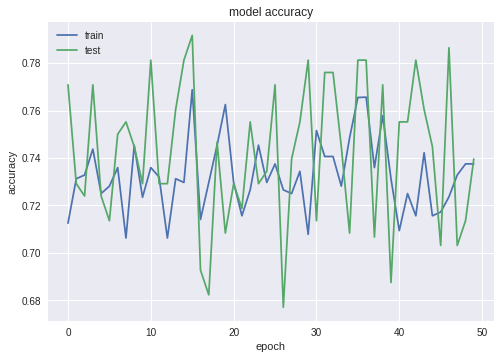

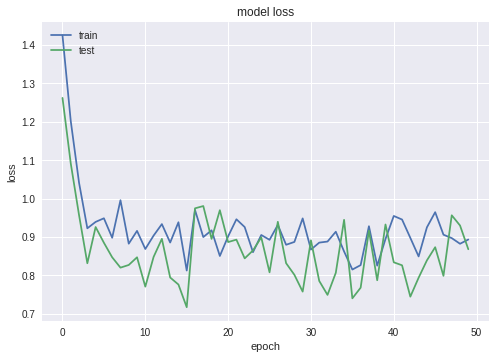

In [51]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist_plot.history['acc'])
plt.plot(hist_plot.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist_plot.history['loss'])
plt.plot(hist_plot.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()